# Departamento de Recursos Humanos

# Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import precision_score, recall_score, f1_score, classification_report

In [2]:
rh = pd.read_csv("Human_Resources.csv")
rh.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
rh.shape

(1470, 35)

In [4]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
rh.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualização dos dados

In [6]:
rh['Attrition'] = rh['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
rh['OverTime'] = rh['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
rh['Over18'] = rh['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [7]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
sns.heatmap(rh.isnull(), cbar = False);

In [ ]:
rh.hist(bins = 30, figsize=(20,20), color = 'r');

In [8]:
rh.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [9]:
saiu_df = rh[rh['Attrition'] == 1]
ficou_df = rh[rh['Attrition'] == 0]

In [10]:
print('Total = ', len(rh))
print('Número de funcionários que saíram da empresa = ', len(saiu_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(saiu_df) / len(rh)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(ficou_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(ficou_df) / len(rh)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [11]:
saiu_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
ficou_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
correlations = rh.corr();
f, ax = plt.subplots(figsize = (20,20));
sns.heatmap(correlations, annot=True);

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=rh);

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = rh)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = rh)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = rh)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = rh)

In [ ]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(saiu_df['DistanceFromHome'], label = 'Funcionários que saíram', color = 'r')
sns.kdeplot(ficou_df['DistanceFromHome'], label = 'Funcionários que ficaram', color = 'b');

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(saiu_df['TotalWorkingYears'], label = 'Funcionários que saíram', color = 'r')
sns.kdeplot(ficou_df['TotalWorkingYears'], label = 'Funcionários que ficaram', color = 'b');

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=rh);

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=rh);

# Pré-processamento e bases de treinamento/teste

In [13]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [14]:
X_cat = rh[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [15]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [16]:
X_cat.shape

(1470, 26)

In [17]:
type(X_cat)

numpy.ndarray

In [18]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [19]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
X_numerical = rh[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [43]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [44]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

In [45]:
X_all.rename(columns = {0:'C0'}, inplace=True)
X_all.rename(columns = {1:'C1'}, inplace=True)
X_all.rename(columns = {2:'C2'}, inplace=True)
X_all.rename(columns = {3:'C3'}, inplace=True)
X_all.rename(columns = {4:'C4'}, inplace=True)
X_all.rename(columns = {5:'C5'}, inplace=True)
X_all.rename(columns = {6:'C6'}, inplace=True)
X_all.rename(columns = {7:'C7'}, inplace=True)
X_all.rename(columns = {8:'C8'}, inplace=True)
X_all.rename(columns = {9:'C9'}, inplace=True)
X_all.rename(columns = {10:'C10'}, inplace=True)
X_all.rename(columns = {11:'C11'}, inplace=True)
X_all.rename(columns = {12:'C12'}, inplace=True)
X_all.rename(columns = {13:'C13'}, inplace=True)
X_all.rename(columns = {14:'C14'}, inplace=True)
X_all.rename(columns = {15:'C15'}, inplace=True)
X_all.rename(columns = {16:'C16'}, inplace=True)
X_all.rename(columns = {17:'C17'}, inplace=True)
X_all.rename(columns = {18:'C18'}, inplace=True)
X_all.rename(columns = {19:'C19'}, inplace=True)
X_all.rename(columns = {20:'C20'}, inplace=True)
X_all.rename(columns = {21:'C21'}, inplace=True)
X_all.rename(columns = {22:'C22'}, inplace=True)
X_all.rename(columns = {23:'C23'}, inplace=True)
X_all.rename(columns = {24:'C24'}, inplace=True)
X_all.rename(columns = {25:'C25'}, inplace=True)

In [46]:
X_all

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [49]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [50]:
y = rh['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Regressão Logistica

In [53]:
from sklearn.linear_model    import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [55]:
y_test

1332    1
172     0
237     0
719     0
8       0
       ..
1251    0
694     0
245     0
1195    0
214     1
Name: Attrition, Length: 368, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_pred)

0.8994565217391305

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[307,   7],
       [ 30,  24]], dtype=int64)

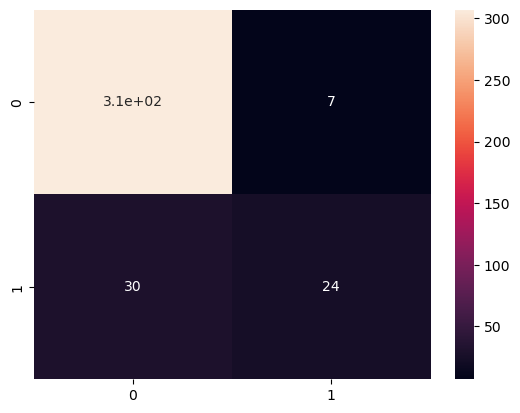

In [61]:
sns.heatmap(cm, annot=True);

In [62]:
# Precision
23 / (23 + 3)

0.8846153846153846

In [63]:
# Precision
23 / (23 + 3)

0.8846153846153846

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [65]:
precision_score(y_test, y_pred)

0.7741935483870968

In [66]:
recall_score(y_test, y_pred)

0.4444444444444444

In [67]:
recall_score(y_test, y_pred)

0.4444444444444444

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       314
           1       0.77      0.44      0.56        54

    accuracy                           0.90       368
   macro avg       0.84      0.71      0.75       368
weighted avg       0.89      0.90      0.89       368



# Randon Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = forest.predict(X_test)

In [72]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[312,  44],
       [  2,  10]], dtype=int64)

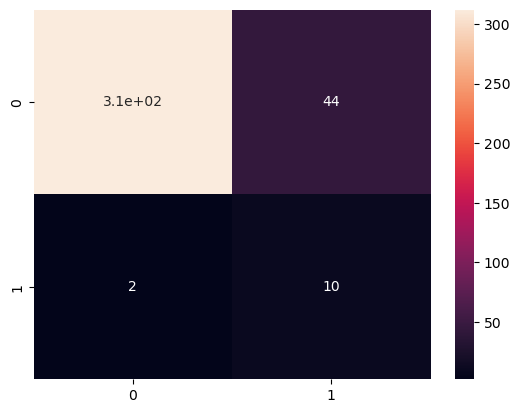

In [74]:
sns.heatmap(cm, annot=True);

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       314
           1       0.83      0.19      0.30        54

    accuracy                           0.88       368
   macro avg       0.85      0.59      0.62       368
weighted avg       0.87      0.88      0.84       368



# Redes Neurais Artificiais

In [76]:
import tensorflow as tf

In [77]:
X_train.shape

(1102, 50)

In [78]:
(50 + 1) / 2

25.5

In [80]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [81]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2601 (10.16 KB)
Trainable params: 2601 (10.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [83]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 6s 7ms/step - loss: 0.5048 - accuracy: 0.8303
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8339
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8339
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8339
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8475
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8584
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8612
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8748
Epoch 9/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8784
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8757
Epoch 11/

35/35 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9973
Epoch 84/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9973
Epoch 85/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9973
Epoch 86/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9964
Epoch 87/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9982
Epoch 88/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9982
Epoch 89/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9973
Epoch 90/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9973
Epoch 91/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9982
Epoch 92/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9991
Epoch 93/200


35/35 [==============================] - 0s 2ms/step - loss: 4.1545e-04 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 2ms/step - loss: 4.0667e-04 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 2ms/step - loss: 3.9033e-04 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 2ms/step - loss: 3.8195e-04 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 3ms/step - loss: 3.7498e-04 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 0s 3ms/step - loss: 3.5951e-04 - accuracy: 1.0000
Epoch 169/200
35/35 [==============================] - 0s 2ms/step - loss: 3.3719e-04 - accuracy: 1.0000
Epoch 170/200
35/35 [==============================] - 0s 2ms/step - loss: 3.2854e-04 - accuracy: 1.0000
Epoch 171/200
35/35 [==============================] - 0s 2ms/step - loss: 3.1985e-04 - accuracy: 1.0000
Epoch 172/200
35/35 [==============================] - 0s 2ms/step - 

In [84]:
y_pred = rede_neural.predict(X_test)
y_pred

12/12 [==============================] - 0s 3ms/step


array([[1.00000000e+00],
       [2.53306798e-09],
       [2.81183247e-07],
       [1.02979566e-05],
       [4.88329099e-11],
       [4.47888618e-15],
       [1.14065951e-12],
       [1.16943755e-11],
       [7.66552705e-27],
       [7.40537018e-07],
       [5.97944819e-11],
       [3.18113621e-06],
       [2.63804134e-09],
       [1.30370075e-12],
       [7.22951445e-05],
       [2.40854069e-06],
       [9.98993576e-01],
       [3.26561254e-14],
       [1.18481705e-03],
       [9.99999821e-01],
       [4.82068360e-02],
       [2.58335331e-09],
       [7.22963875e-03],
       [1.89474120e-03],
       [1.44209435e-15],
       [9.82131898e-01],
       [8.01202305e-09],
       [3.28717768e-01],
       [1.90190447e-13],
       [8.11915726e-12],
       [3.71782505e-07],
       [1.48932082e-13],
       [1.23806757e-07],
       [3.50729884e-12],
       [5.15758400e-12],
       [8.23621704e-08],
       [1.69100720e-04],
       [1.31240279e-06],
       [1.81073507e-11],
       [2.92184462e-13],


In [85]:
y_pred = (y_pred >= 0.5)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [86]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[294,  20],
       [ 34,  20]], dtype=int64)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       314
           1       0.50      0.37      0.43        54

    accuracy                           0.85       368
   macro avg       0.70      0.65      0.67       368
weighted avg       0.84      0.85      0.84       368



# Salvando o Classificador

In [88]:
import pickle

In [89]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

In [90]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [91]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [94]:
X_novo = rh.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [95]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [96]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [97]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [98]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [100]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [104]:
X_all_novo.rename(columns = {0:'C0'}, inplace=True)
X_all_novo.rename(columns = {1:'C1'}, inplace=True)
X_all_novo.rename(columns = {2:'C2'}, inplace=True)
X_all_novo.rename(columns = {3:'C3'}, inplace=True)
X_all_novo.rename(columns = {4:'C4'}, inplace=True)
X_all_novo.rename(columns = {5:'C5'}, inplace=True)
X_all_novo.rename(columns = {6:'C6'}, inplace=True)
X_all_novo.rename(columns = {7:'C7'}, inplace=True)
X_all_novo.rename(columns = {8:'C8'}, inplace=True)
X_all_novo.rename(columns = {9:'C9'}, inplace=True)
X_all_novo.rename(columns = {10:'C10'}, inplace=True)
X_all_novo.rename(columns = {11:'C11'}, inplace=True)
X_all_novo.rename(columns = {12:'C12'}, inplace=True)
X_all_novo.rename(columns = {13:'C13'}, inplace=True)
X_all_novo.rename(columns = {14:'C14'}, inplace=True)
X_all_novo.rename(columns = {15:'C15'}, inplace=True)
X_all_novo.rename(columns = {16:'C16'}, inplace=True)
X_all_novo.rename(columns = {17:'C17'}, inplace=True)
X_all_novo.rename(columns = {18:'C18'}, inplace=True)
X_all_novo.rename(columns = {19:'C19'}, inplace=True)
X_all_novo.rename(columns = {20:'C20'}, inplace=True)
X_all_novo.rename(columns = {21:'C21'}, inplace=True)
X_all_novo.rename(columns = {22:'C22'}, inplace=True)
X_all_novo.rename(columns = {23:'C23'}, inplace=True)
X_all_novo.rename(columns = {24:'C24'}, inplace=True)
X_all_novo.rename(columns = {25:'C25'}, inplace=True)

In [105]:
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [106]:
model.predict(X_novo)

array([1], dtype=int64)

In [107]:
model.predict_proba(X_novo)

array([[0.30979846, 0.69020154]])

In [108]:
model.classes_

array([0, 1], dtype=int64)